                             OVERVIEW
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.



                      ATTRIBUTES
*obj_ID = Object Identifier, the unique value that identifies the object in the *image catalog used by the CAS
*alpha = Right Ascension angle (at J2000 epoch)
*delta = Declination angle (at J2000 epoch)
*u = Ultraviolet filter in the photometric system
*g = Green filter in the photometric system
*r = Red filter in the photometric system
*i = Near Infrared filter in the photometric system
*z = Infrared filter in the photometric system
*run_ID = Run Number used to identify the specific scan
*rereun_ID = Rerun Number to specify how the image was processed
*cam_col = Camera column to identify the scanline within the run
*field_ID = Field number to identify each field
*spec_obj_ID = Unique ID used for optical spectroscopic objects (this means *that 2 different observations with the same spec_obj_ID must share the output class)
*class = object class (galaxy, star or quasar object)
*redshift = redshift value based on the increase in wavelength
*plate = plate ID, identifies each plate in SDSS
*MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
*fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

LOAD NECESSARY LIBRARIES


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_curve,roc_auc_score
import pickle

LOADING DATASET INTO DATAFRAME

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/stellar_prjct.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,NaN,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

FINDING MISSING VALUES

In [ ]:
df.isna().sum()

obj_ID          0
alpha           0
delta           0
u               0
g               0
r              25
i               0
z              10
run_ID          0
rerun_ID        0
cam_col         0
field_ID        0
spec_obj_ID     0
class           0
redshift        0
plate           0
MJD             0
fiber_ID        0
dtype: int64

FILLING MISSING VALUES

In [ ]:
l=["r","z"]
for i in l:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

FINDING DATATYPES

In [ ]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [ ]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

CHECKING CLASS DISTRIBUTION

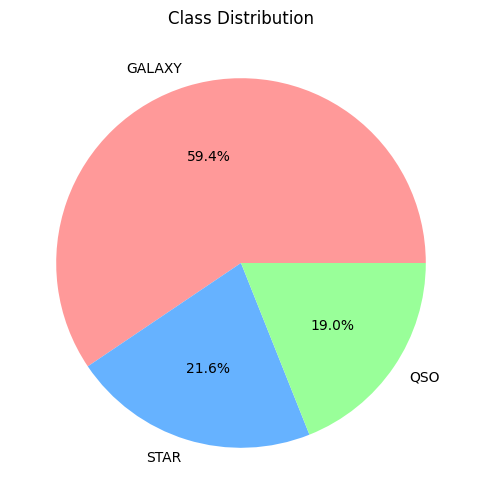

In [ ]:
class_counts=df["class"].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99']
plt.figure(figsize=(10, 6))
plt.pie(class_counts.values, labels=class_counts.index,autopct='%1.1f%%',colors=colors)
plt.title('Class Distribution')
plt.show()

TRANSFORMING CATEGORICAL DATA INTO NUMERIC

In [ ]:
encoder=LabelEncoder()
df["class"]=encoder.fit_transform(df["class"])

In [ ]:
df["class"].value_counts()


class
0    59445
2    21594
1    18961
Name: count, dtype: int64

SEPERATING  VARIABLES

In [ ]:
X=df.drop(["class"],axis=1)
y=df["class"]

CHECKING THE CORRELATION

In [ ]:
correlation=df.corr()["class"]
df=pd.DataFrame(correlation)
df.sort_values(by="class",ascending=True).head(20)

,class
r,-0.076828
redshift,-0.054239
fiber_ID,-0.041586
run_ID,-0.036014
field_ID,-0.034833
u,-0.024645
g,-0.020066
alpha,-0.011756
spec_obj_ID,-0.010075
plate,-0.010060


DROPING THE LEAST CORRELATED VALUES

In [ ]:
X=X.drop(["obj_ID","MJD","z","plate","spec_obj_ID","rerun_ID"],axis=1)
X

,alpha,delta,u,g,r,i,run_ID,cam_col,field_ID,redshift,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,3606,2,79,0.634794,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,4518,5,119,0.779136,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,3606,2,120,0.644195,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,4192,3,214,0.932346,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,8102,3,137,0.116123,842
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,7778,2,581,0.000000,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,7917,1,289,0.404895,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,5314,4,308,0.143366,74
99998,212.268621,46.660365,25.35039,21.63757,24.80203,19.07254,3650,4,131,0.455040,470


SCALING THE ATTRIBUTES

In [ ]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_sc

array([[-0.43460358,  0.42552871,  0.0597546 , ..., -0.71894695,
         0.07955728, -1.02134224],
       [-0.33992143,  0.36340227,  0.08804527, ..., -0.45050918,
         0.2770962 , -0.0818825 ],
       [-0.36725058,  0.58271274,  0.10332677, ..., -0.44379823,
         0.09242283, -0.55161237],
       ...,
       [ 0.48660555, -0.4293603 , -0.02553763, ...,  0.81785929,
        -0.59298352, -1.37730941],
       [ 0.35895205,  1.14663054,  0.10607535, ..., -0.36997785,
        -0.16644396,  0.07591737],
       [ 0.19965373,  1.28938133,  0.02018443, ..., -0.84645489,
        -0.04614265,  1.47409769]])

SPLITTING THE DATASET INTO TRAINING AND TESTING

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=1)

CREATING MODELS AND CHECKING PERFORMANCE

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier(random_state=1)
gnb=GaussianNB()
rf=RandomForestClassifier(random_state=1)
gbc=GradientBoostingClassifier(random_state=1)
ada=AdaBoostClassifier(random_state=1)
models=[knn,svc,dtc,gnb,rf,gbc,ada]
for model in models:
  model.fit(X_train,y_train)
  ypred=model.predict(X_test)
  print(model)
  print(classification_report(y_test,ypred))
  print(accuracy_score(y_test,ypred)*100)
  print("*"*60)



KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17821
           1       0.97      0.82      0.89      5725
           2       0.88      0.79      0.83      6454

    accuracy                           0.89     30000
   macro avg       0.91      0.86      0.88     30000
weighted avg       0.90      0.89      0.89     30000

89.45666666666666
************************************************************
SVC()
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17821
           1       0.97      0.89      0.93      5725
           2       0.93      1.00      0.96      6454

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

95.66666666666667
************************************************************
DecisionTreeClassifier(random_state=1)
            

OVERSAMPLING

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)


CHECKING CLASS DISTRIBUTION

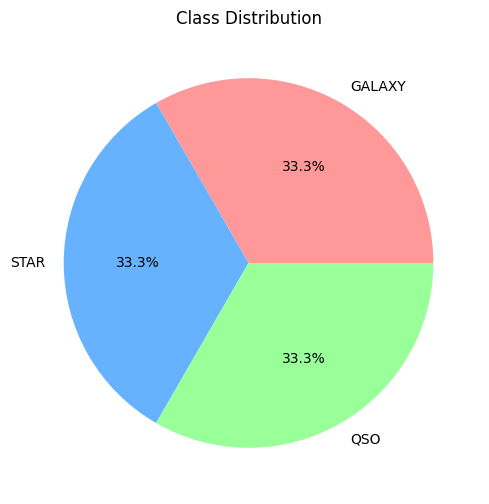

In [ ]:
class_counts1=y_os.value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99']
plt.figure(figsize=(10, 6))
plt.pie(class_counts1.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution')
plt.show()

SCALING THE ATTRIBUTES AFTER OVERSAMPLING

In [ ]:
sc1=StandardScaler()
X_sc1=sc1.fit_transform(X_os)
X_sc1

array([[-0.4263636 ,  0.39815216,  0.08776015, ..., -0.71384573,
        -0.08848301, -1.01957258],
       [-0.33289788,  0.33628732,  0.12356317, ..., -0.43779775,
         0.07585323, -0.08066119],
       [-0.35987592,  0.55467436,  0.14290254, ..., -0.43089655,
        -0.07777992, -0.55011688],
       ...,
       [ 1.74566728, -0.6170171 ,  0.03097335, ..., -0.40329176,
        -0.81197836,  0.81057111],
       [-1.69215464, -1.28896803,  0.02542843, ...,  0.0866934 ,
        -0.81112543, -1.59905695],
       [-0.53945037,  0.69597261, -0.07354112, ..., -0.38258816,
        -0.81127398,  0.14306379]])

SPLITTING THE DATASET INTO TRAINING AND TESTING AFTER OVERSAMPLING

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sc1,y_os,test_size=0.3,random_state=1)

CREATING MODELS AND CHECKING PERFORMANCE AFTER OVERSAMPLING

In [ ]:
knn1=KNeighborsClassifier()
svc1=SVC()
dtc1=DecisionTreeClassifier(random_state=1)
gnb1=GaussianNB()
rf1=RandomForestClassifier(random_state=1)
gbc1=GradientBoostingClassifier(random_state=1)
ada1=AdaBoostClassifier(random_state=1)
models=[knn1,svc1,dtc1,gnb1,rf1,gbc1,ada1]
for model in models:
  model.fit(X_train,y_train)
  ypred1=model.predict(X_test)
  print(model)
  print(classification_report(y_test,ypred1))
  print(accuracy_score(y_test,ypred1)*100)
  print("*"*60)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     17917
           1       0.97      0.93      0.95     17571
           2       0.91      0.93      0.92     18013

    accuracy                           0.92     53501
   macro avg       0.92      0.92      0.92     53501
weighted avg       0.92      0.92      0.92     53501

91.65249247677613
************************************************************
SVC()
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     17917
           1       0.98      0.95      0.97     17571
           2       0.96      1.00      0.98     18013

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501

96.52716771649128
************************************************************
DecisionTreeClassifier(random_state=1)
            

MODEL ACCURACY COMPARISON GRAPH

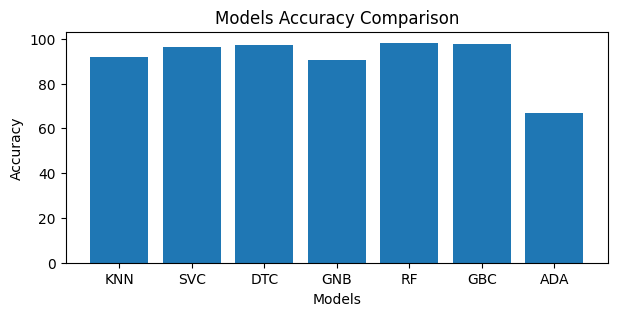

In [ ]:
mo=["KNN","SVC","DTC","GNB","RF","GBC","ADA"]
accuracy=[91.65,96.52,97.1,90.41,98.23,97.68,66.94]
plt.figure(figsize=(7,3))
plt.bar(mo,accuracy)
plt.title("Models Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

PREDICTION A NEW VALUE

In [ ]:
y_new=rf1.predict(sc1.transform([[142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,3606,2,120,0.644195,299]]))
result=y_new.item()
if result==0:
  print("Galaxy")
elif result==1:
  print("QSO")
else:
  print("STAR")

Galaxy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pickle.dump(rf1,open("PROJECT.sav","wb"))

In [ ]:
pickle.dump(sc1,open("StandardScaler.sav","wb"))